<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 20px; border-radius: 5px; text-align: center; border: 4px solid white;">
    <h1 style="color: white; font-size: 30px; font-weight: bold;">Fruit Classification</h1>
</div>


<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Importing Libraries & Dataset</h1>
</div>


In [53]:
import numpy as np 
import pandas as pd 
import os        
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import glob as gb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import PIL
import cv2
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Generating DataFrame</h1>
</div>


In [54]:
base_dir = r'C:\Users\acer\Downloads\archive (8)'
train_dir = os.path.join(base_dir, 'fruits-360_dataset', 'fruits-360', 'Training')
test_dir = os.path.join(base_dir, 'fruits-360_dataset', 'fruits-360', 'Test')
for dirpath, dirnames, filenames in os.walk(train_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 131 directories and 0 images in 'C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Training'.
There are 0 directories and 492 images in 'C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Training\Apple Braeburn'.
There are 0 directories and 444 images in 'C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Training\Apple Crimson Snow'.
There are 0 directories and 480 images in 'C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Training\Apple Golden 1'.
There are 0 directories and 492 images in 'C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Training\Apple Golden 2'.
There are 0 directories and 481 images in 'C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Training\Apple Golden 3'.
There are 0 directories and 492 images in 'C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Training\Apple Granny Smith'.
There are 0 directories and 456 images in 'C:\Users\acer\Downl

In [55]:
base_dir = r'C:\Users\acer\Downloads\archive (8)'
train_dir = os.path.join(base_dir, 'fruits-360_dataset', 'fruits-360', 'Training')
validation_dir = os.path.join(base_dir, 'fruits-360_dataset', 'fruits-360', 'Test')
def create_dataframe(data_path):
    df = []
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            if f_path.endswith('jpg'):
                df.append([f_path, c])
    return pd.DataFrame(df, columns=('filename', 'class'))
classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])
# constants
#print(CLASSES)
# creating dataframes
df_train = create_dataframe(train_dir)
df_test = create_dataframe(test_dir)
df_train,df_test

(                                                filename           class
 0      C:\Users\acer\Downloads\archive (8)\fruits-360...  Apple Braeburn
 1      C:\Users\acer\Downloads\archive (8)\fruits-360...  Apple Braeburn
 2      C:\Users\acer\Downloads\archive (8)\fruits-360...  Apple Braeburn
 3      C:\Users\acer\Downloads\archive (8)\fruits-360...  Apple Braeburn
 4      C:\Users\acer\Downloads\archive (8)\fruits-360...  Apple Braeburn
 ...                                                  ...             ...
 67687  C:\Users\acer\Downloads\archive (8)\fruits-360...      Watermelon
 67688  C:\Users\acer\Downloads\archive (8)\fruits-360...      Watermelon
 67689  C:\Users\acer\Downloads\archive (8)\fruits-360...      Watermelon
 67690  C:\Users\acer\Downloads\archive (8)\fruits-360...      Watermelon
 67691  C:\Users\acer\Downloads\archive (8)\fruits-360...      Watermelon
 
 [67692 rows x 2 columns],
                                                 filename           class
 0      C

In [56]:
df_train.head()

,filename,class
0,C:\Users\acer\Downloads\archive (8)\fruits-360...,Apple Braeburn
1,C:\Users\acer\Downloads\archive (8)\fruits-360...,Apple Braeburn
2,C:\Users\acer\Downloads\archive (8)\fruits-360...,Apple Braeburn
3,C:\Users\acer\Downloads\archive (8)\fruits-360...,Apple Braeburn
4,C:\Users\acer\Downloads\archive (8)\fruits-360...,Apple Braeburn


<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Splitting Training file into Train and Validation</h1>
</div>


In [57]:
df_train, df_val = train_test_split(df_train, test_size=0.30, random_state=0)
df_train,df_val

(                                                filename          class
 7919   C:\Users\acer\Downloads\archive (8)\fruits-360...         Banana
 62739  C:\Users\acer\Downloads\archive (8)\fruits-360...       Tomato 2
 30292  C:\Users\acer\Downloads\archive (8)\fruits-360...    Lemon Meyer
 8090   C:\Users\acer\Downloads\archive (8)\fruits-360...         Banana
 65330  C:\Users\acer\Downloads\archive (8)\fruits-360...  Tomato Maroon
 ...                                                  ...            ...
 41993  C:\Users\acer\Downloads\archive (8)\fruits-360...           Pear
 21243  C:\Users\acer\Downloads\archive (8)\fruits-360...    Ginger Root
 45891  C:\Users\acer\Downloads\archive (8)\fruits-360...     Pear Stone
 42613  C:\Users\acer\Downloads\archive (8)\fruits-360...         Pear 2
 43567  C:\Users\acer\Downloads\archive (8)\fruits-360...   Pear Forelle
 
 [47384 rows x 2 columns],
                                                 filename               class
 13965  C:\Users\

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Eploratory Data Analysis (EDA)</h1>
</div>


In [58]:
# Function to count the number of images in a directory
def count_images_in_directory(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                total_images += 1
    return total_images

# Count the number of images in the train and test directories
train_image_count = count_images_in_directory(train_dir)
test_image_count = count_images_in_directory(test_dir)

print("Number of images in train directory:", train_image_count)
print("Number of images in test directory:", test_image_count)

Number of images in train directory: 67692
Number of images in test directory: 22688


In [59]:
import pathlib
data_dir = pathlib.Path(train_dir) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 'Maracuja' 'Melon Piel de Sapo' 'Mulberry' 'Nectarine'
 'Nectarine Flat

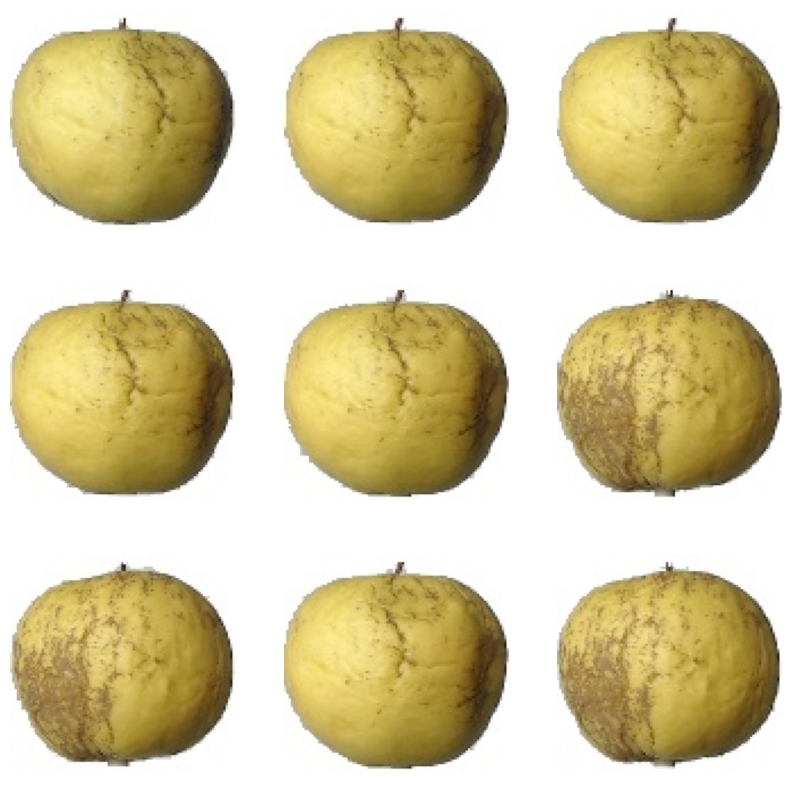

In [60]:
fruits = list(data_dir.glob('Apple Golden 1/*.jpg'))
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

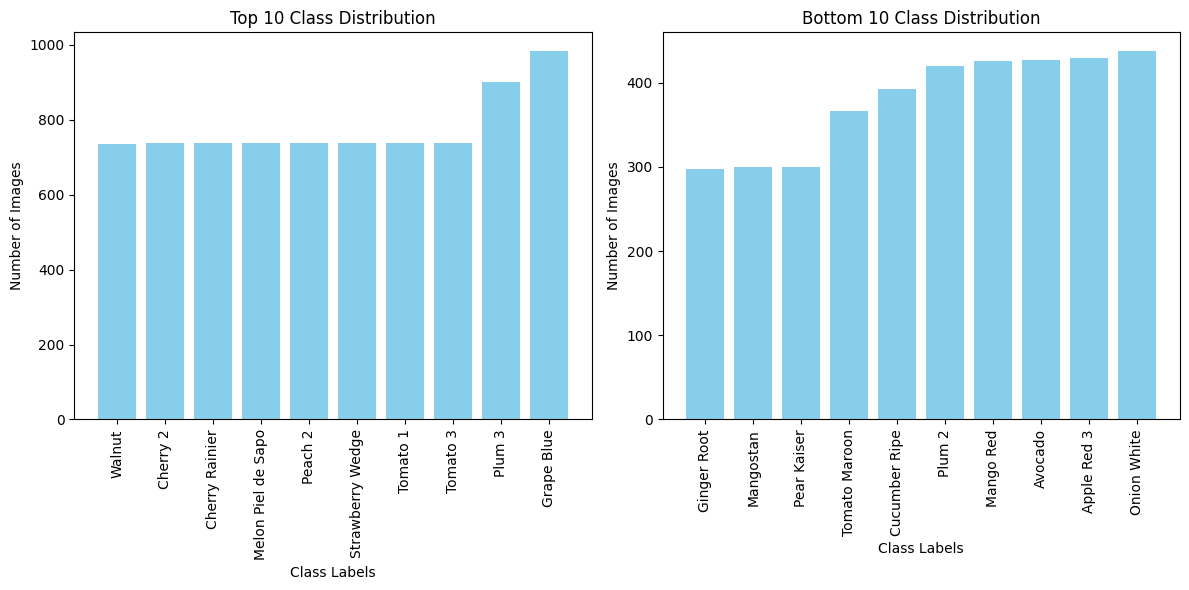

In [61]:

# Function to count the number of images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count the number of images per class in the training directory
train_class_counts = count_images_per_class(data_dir)

# Sort class counts by their values
sorted_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[1]))

# Take the top 10 and bottom 10 classes
top_10_classes = dict(list(sorted_class_counts.items())[-10:])
bottom_10_classes = dict(list(sorted_class_counts.items())[:10])

# Plot the top 10 classes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_classes.keys(), top_10_classes.values(), color='skyblue')
plt.title('Top 10 Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Plot the bottom 10 classes
plt.subplot(1, 2, 2)
plt.bar(bottom_10_classes.keys(), bottom_10_classes.values(), color='skyblue')
plt.title('Bottom 10 Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()

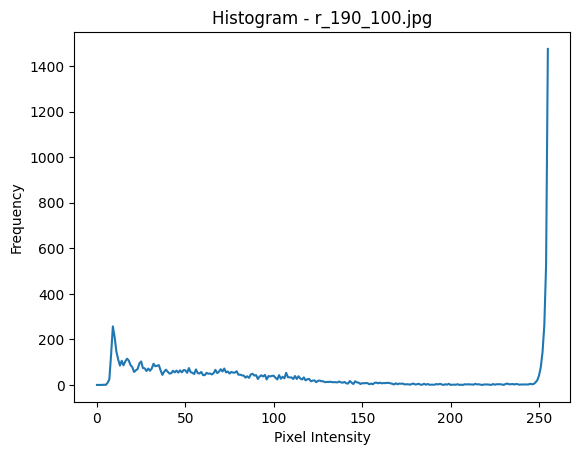

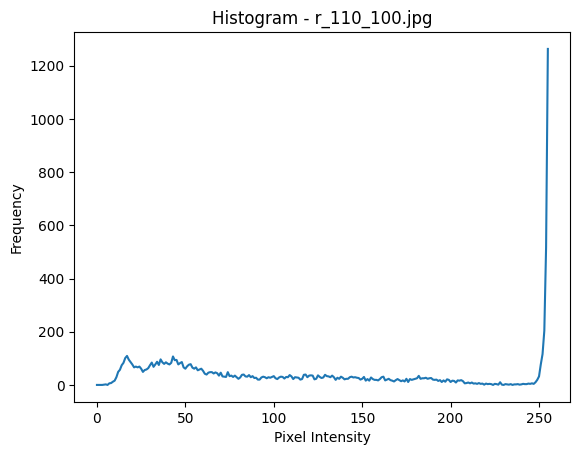

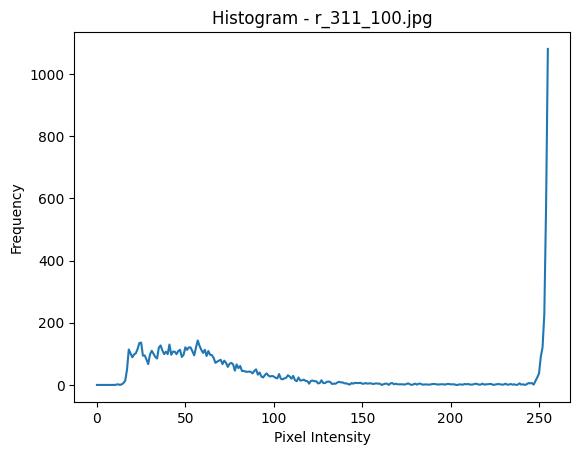

In [62]:

# Select 3 random image paths from the directory
selected_image_paths = np.random.choice(list(data_dir.glob("Apple Braeburn/*.jpg")), 3, replace=False)

# Iterate over the selected image paths
for image_path in selected_image_paths:
    # Load an image
    image = cv2.imread(str(image_path))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    # Plot histogram
    plt.figure()
    plt.title('Histogram - {}'.format(image_path.name))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.plot(hist)
    plt.show()

In [63]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob as gb
# Define the data directory
# List to store image sizes
size = []
# Iterate through each folder in the seg_train directory
for folder in os.listdir(os.path.join(data_dir)):
    # Glob all jpg files in the current folder
    files = gb.glob(os.path.join(data_dir, folder, '*.jpg'))
    # Iterate through each file
    for file in files:
        # Read the image and get its shape
        image = plt.imread(file)
        size.append(image.shape)
# Count the occurrence of each size
size_counts = pd.Series(size).value_counts()
# Display the counts of each size
print(size_counts)
# Print the most common size
most_common_size = size_counts.idxmax()
print("Most common size:", most_common_size)

(100, 100, 3)    67692
Name: count, dtype: int64
Most common size: (100, 100, 3)


In [64]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.choice(os.listdir(target_folder))

    # Read in the image
    img = mpimg.imread(os.path.join(target_folder, random_image))

    return img

# Define the number of rows and columns for subplots
rows = 17  # Adjust according to the total number of classes (131 in this case)
cols = 8   # Adjust the number of columns as needed

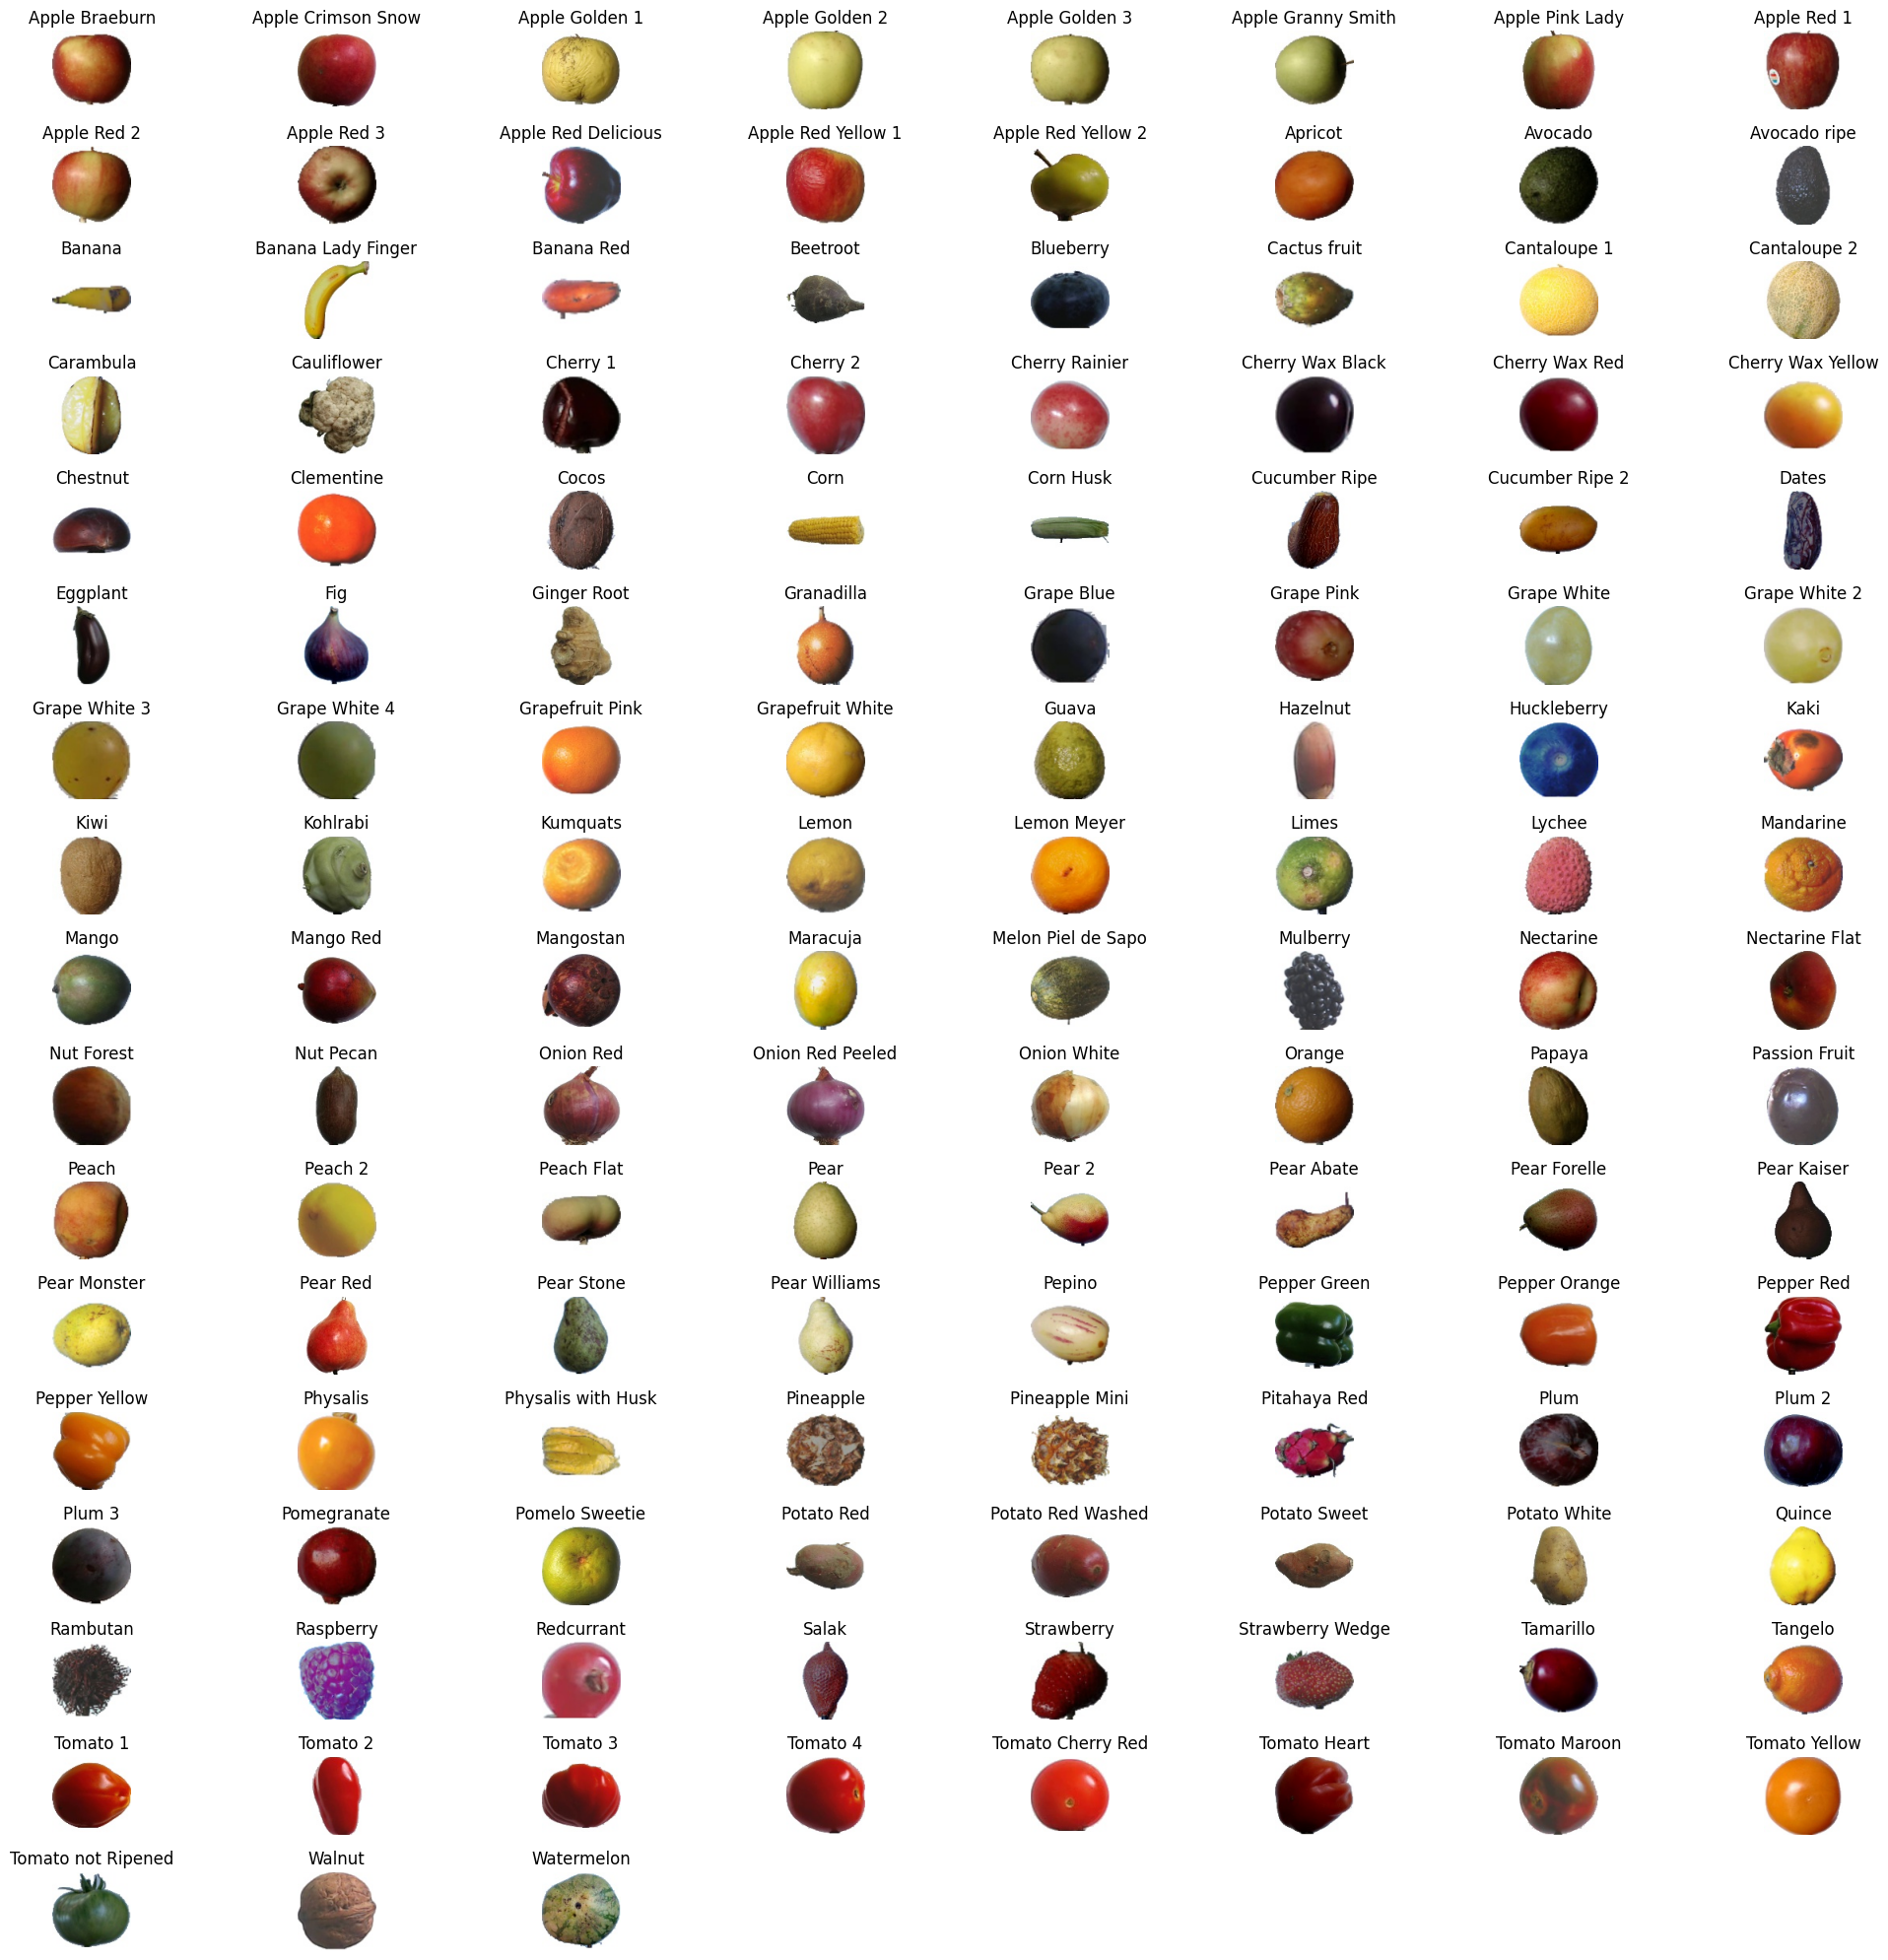

In [65]:
plt.figure(figsize=(20, 20))
# View a random image from the training dataset for all classes
for i, class_name in enumerate(class_names):
    img = view_random_image(target_dir=data_dir, target_class=class_name)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")

plt.tight_layout()
plt.show()

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Preprocessing & Using ImageDataGenerator() to Read Images</h1>
</div>


In [66]:
train_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_train,
    target_size=(100, 100),
    batch_size=60,
    classes=classes,
    class_mode='categorical'  
)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_val,
    target_size=(100, 100),
    batch_size=75,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_test,
    target_size=(100, 100),
    batch_size=75,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)
train_generator = train_gen
validation_generator = val_gen
test_generator = test_gen

Found 47384 validated image filenames belonging to 131 classes.
Found 20308 validated image filenames belonging to 131 classes.
Found 22688 validated image filenames belonging to 131 classes.


In [67]:
(train_gen.classes)

[16,
 121,
 60,
 16,
 126,
 71,
 104,
 86,
 2,
 125,
 12,
 1,
 78,
 51,
 102,
 55,
 78,
 19,
 48,
 119,
 41,
 28,
 15,
 22,
 12,
 91,
 30,
 113,
 13,
 88,
 111,
 49,
 55,
 6,
 61,
 42,
 12,
 79,
 104,
 92,
 77,
 81,
 46,
 32,
 81,
 63,
 125,
 96,
 107,
 86,
 90,
 29,
 99,
 38,
 130,
 47,
 103,
 115,
 79,
 70,
 8,
 56,
 24,
 129,
 100,
 96,
 74,
 44,
 8,
 107,
 30,
 86,
 101,
 23,
 9,
 76,
 82,
 26,
 112,
 100,
 73,
 79,
 125,
 51,
 79,
 40,
 81,
 0,
 55,
 111,
 49,
 15,
 16,
 122,
 107,
 71,
 92,
 41,
 93,
 53,
 63,
 127,
 43,
 32,
 71,
 85,
 11,
 112,
 80,
 77,
 117,
 71,
 66,
 84,
 117,
 104,
 42,
 83,
 120,
 18,
 33,
 125,
 102,
 78,
 33,
 123,
 95,
 14,
 22,
 94,
 44,
 110,
 122,
 76,
 111,
 100,
 98,
 44,
 96,
 65,
 41,
 111,
 25,
 41,
 11,
 94,
 20,
 78,
 12,
 104,
 81,
 39,
 74,
 27,
 15,
 71,
 69,
 55,
 0,
 119,
 13,
 116,
 15,
 64,
 110,
 27,
 34,
 85,
 82,
 11,
 90,
 17,
 126,
 105,
 72,
 64,
 94,
 103,
 129,
 93,
 113,
 35,
 15,
 106,
 67,
 65,
 3,
 89,
 108,
 25,
 58,
 63,


In [68]:
y_test = test_generator.classes
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [69]:
train_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Modeling</h1>
</div>


In [90]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5) ,            
    Dense(131, activation='softmax')  
])

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [71]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall

In [91]:
from tensorflow.keras import backend as K

# Define F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_state(self):  # Renamed from reset_states
        self.precision.reset_state()
        self.recall.reset_state()

In [92]:
metrics = [
    'accuracy',
    Precision(),  # Precision
    Recall(),     # Recall
    F1Score()
]

In [93]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=metrics)

model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=55,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 562ms/step - accuracy: 0.0128 - f1_score: 0.0000e+00 - loss: 4.9513 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0317 - val_f1_score: 0.0000e+00 - val_loss: 4.8534 - val_precision_4: 0.0000e+00 - val_recall_4: 0.0000e+00
Epoch 2/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 453ms/step - accuracy: 0.0212 - f1_score: 0.0000e+00 - loss: 4.8632 - precision_4: 0.0000e+00 - recall_4: 0.0000e+00 - val_accuracy: 0.0083 - val_f1_score: 0.0100 - val_loss: 4.7555 - val_precision_4: 1.0000 - val_recall_4: 0.0050
Epoch 3/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - accuracy: 0.0348 - f1_score: 0.0114 - loss: 4.6943 - precision_4: 0.5741 - recall_4: 0.0057 - val_accuracy: 0.0517 - val_f1_score: 0.0231 - val_loss: 4.5349 - val_precision_4: 1.0000 - val_recall_4: 0.0117
Epoch 4/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.0941 - f1_score: 0.0077 - loss: 4.4982 - precision_4: 0.3704 - recall_4: 0.0039 - val_accuracy: 0.0883 - val_f1_score: 0.0198 

C:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 396ms/step - accuracy: 0.8429 - f1_score: 0.8407 - loss: 0.4916 - precision_4: 0.9009 - recall_4: 0.7882 - val_accuracy: 0.9633 - val_f1_score: 0.9638 - val_loss: 0.1257 - val_precision_4: 0.9744 - val_recall_4: 0.9533
Epoch 36/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.8908 - f1_score: 0.9005 - loss: 0.3479 - precision_4: 0.9428 - recall_4: 0.8620 - val_accuracy: 0.9583 - val_f1_score: 0.9550 - val_loss: 0.1548 - val_precision_4: 0.9724 - val_recall_4: 0.9383
Epoch 37/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.8813 - f1_score: 0.8847 - loss: 0.3638 - precision_4: 0.9109 - recall_4: 0.8601 - val_accuracy: 0.9583 - val_f1_score: 0.9551 - val_loss: 0.1584 - val_precision_4: 0.9707 - val_recall_4: 0.9400
Epoch 38/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 374ms/step - accuracy: 0.8876 - f1_score: 0.8783 - loss: 0.3614 - precision_4: 0.9067 - recall_4: 0.8516 - val_accuracy: 0.9300 - val_f1_score: 0.9265 - val_loss: 0.2247 - val_precision_4: 0.9400

In [75]:
model.save('model2.h5')

In [94]:
eval_result = model.evaluate(test_generator)

303/303 ━━━━━━━━━━━━━━━━━━━━ 44s 146ms/step - accuracy: 0.8870 - f1_score: 0.8910 - loss: 0.4161 - precision_4: 0.9164 - recall_4: 0.8672


In [95]:
print("Test Accuracy:", eval_result[1] )
print("Test Loss:", eval_result[0] )
print("Test Precision:", eval_result[2] )
print("Test Recall:", eval_result[1] )
print("Test f1_score:", eval_result[1] )

Test Accuracy: 0.9054566025733948
Test Loss: 0.34888216853141785
Test Precision: 0.931013822555542
Test Recall: 0.9054566025733948
Test f1_score: 0.9054566025733948


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Prediccion: Tomato Heart


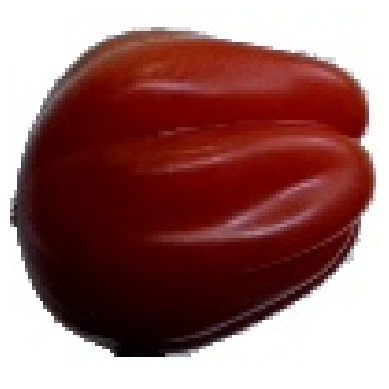

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    fruits = train_generator.class_indices
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = [k for k, v in fruits.items() if v == predicted_class][0]
    
    print("Prediccion:", predicted_label)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
predict_image(r"C:\Users\acer\Downloads\archive (8)\fruits-360_dataset\fruits-360\Test\Tomato Heart\r_34_100.jpg", model)

In [97]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 131)                 │          67,203 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,143,691 (76.84 MB)

 Trainable params: 6,714,563 (25.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,429,128 (51.23 MB)

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Confusion Matrix and Performance Measurements</h1>
</div>


In [98]:
def f1_score(y_true, y_pred):
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

In [99]:
y_pred = model.predict(test_generator)

303/303 ━━━━━━━━━━━━━━━━━━━━ 32s 106ms/step


In [100]:
y_pred = np.argmax(y_pred, axis=1)

In [101]:
y_pred

array([  0,   0,   0, ..., 130, 130, 130], dtype=int64)

True Positives (TP): 148
False Positives (FP): 0
True Negatives (TN): 109
False Negatives (FN): 0
Confusion Matrix:
[[109   0   0 ...   0   0   0]
 [  0 148   0 ...   0   0   0]
 [  0   0 148 ...   0   0   0]
 ...
 [  0   0   0 ... 138   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]


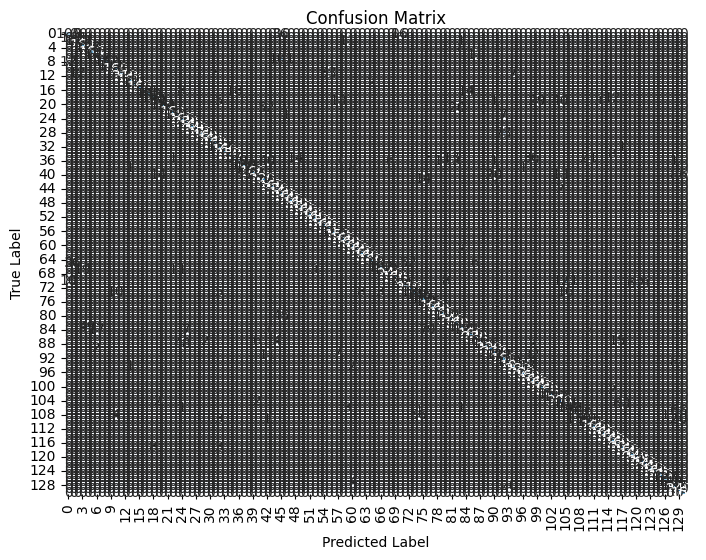

C:\Users\acer\AppData\Local\Temp\ipykernel_1896\1075693548.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=metrics_values, y=metrics_names, palette="viridis")


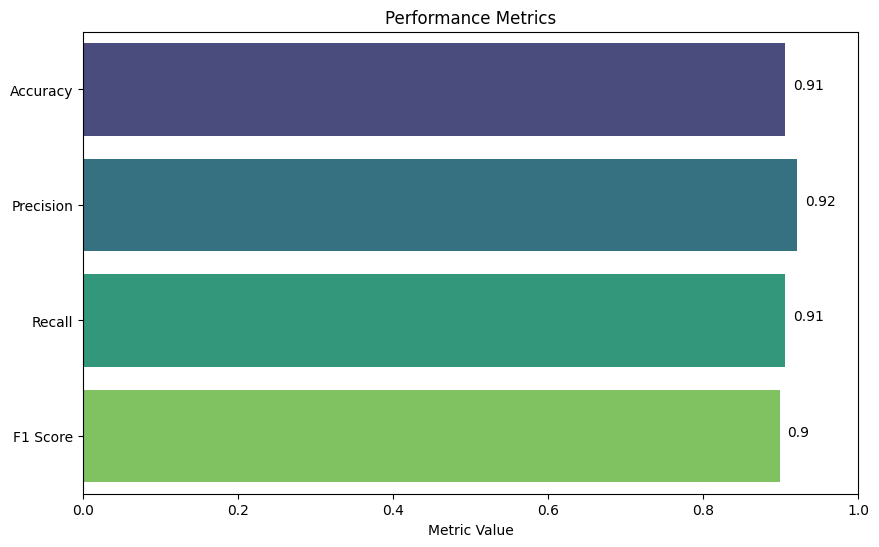

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print TP, FP, TN, FN
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

# Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=metrics_values, y=metrics_names, palette="viridis")
plt.xlabel('Metric Value')
plt.title('Performance Metrics')
plt.xlim(0, 1)  # Adjust the x-axis limits if needed

# Add data labels on each bar
for i, v in enumerate(metrics_values):
    barplot.text(v + 0.01, i, str(round(v, 2)), color='black', ha='left')

plt.show()


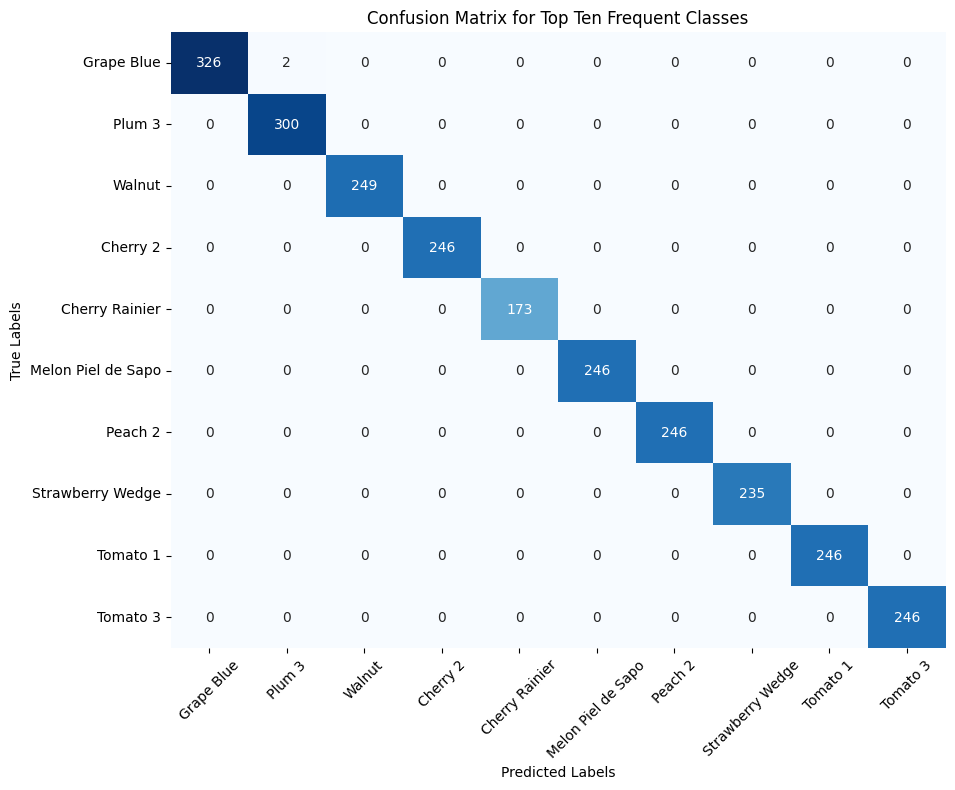

In [103]:
# Assuming you have the true labels (y_test) and predicted labels (y_pred)
# Assuming you already have the confusion matrix (cm)
# Assuming you have a list of class names (class_names)

# Calculate the frequency of each class in the true labels
class_freq = {class_label: sum([1 for label in y_test if label == class_label]) for class_label in set(y_test)}

# Get the top ten classes with the highest frequencies
top_ten_classes = sorted(class_freq, key=class_freq.get, reverse=True)[:10]

# Filter the confusion matrix to include only the top ten classes
top_ten_cm = cm[top_ten_classes][:, top_ten_classes]

# Get the class names for the top ten classes
top_ten_class_names = [class_names[class_label] for class_label in top_ten_classes]

# Plot the filtered confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(top_ten_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Top Ten Frequent Classes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set tick labels
plt.xticks(ticks=np.arange(10) + 0.5, labels=top_ten_class_names, rotation=45)
plt.yticks(ticks=np.arange(10) + 0.5, labels=top_ten_class_names, rotation=0)

plt.show()
